# Laurel and Hardy films

## Results

### Setup the notebook

In [1]:
# import packages and modules
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [2]:
# set default seaborn theme
sns.set_theme()

In [3]:
# import custom modules not in root
sys.path[0] = "..\\"  # update path
from src import load  # noqa: E402

### Import the data

In [4]:
# get data
laurel_hardy: pd.DataFrame = load.Data.get("laurel_hardy")
laurel_hardy.head()

,type,time
0,Silent,2.9
1,Silent,3.2
2,Silent,3.3
3,Silent,3.3
4,Silent,3.3


In [5]:
# check dtypes
laurel_hardy.dtypes

type     object
time    float64
dtype: object

In [6]:
# get samples as series
silent: pd.Series = laurel_hardy.query('type == "Silent"')["time"]
sound: pd.Series = laurel_hardy.query('type == "Sound"')["time"]

### Visualise the sample

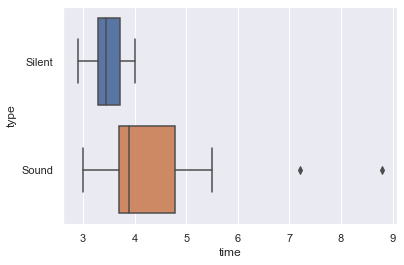

In [7]:
# boxplot of difference
ax = sns.boxplot(x=laurel_hardy["time"], y=laurel_hardy["type"])
plt.show()

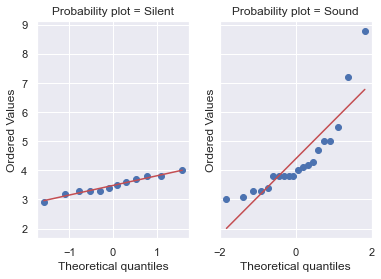

In [8]:
# probability plots
f, axs = plt.subplots(ncols=2, sharey=True)
stats.probplot(x=silent, plot=axs[0])
axs[0].set(title="Probability plot = Silent")
stats.probplot(x=sound, plot=axs[1])
axs[1].set(title="Probability plot = Sound")
plt.show()

### Analyse the data

In [9]:
stats.mannwhitneyu(
    x=silent, y=sound, use_continuity=False, method="asymptotic")

MannwhitneyuResult(statistic=56.0, pvalue=0.012092601579297233)